# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación de los datasets bajo análisis. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

## Parte I

- Determine el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# ¡Actividades!

El objetivo general del práctico es realizar un análsis exploratorio de __los activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

## Parte I

Se proponen las siguientes actividades:


- Determine el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indague sobre la existencia de valores faltantes. ¿Cómo trataría a los faltantes? ¿Por qué? 


- Analice las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación).


- ¿Hay outliers?


- Seleccione un activo y grafique un boxplot para cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?


- Explore la existencia de estacionalidad. **(Preguntar a la profe)**


- Estudie la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis? **(Grafico de Vela, que periodo a analizar)**¿Los activos tienden a moverse en forma conjunta? **(Grafico de linea de todos los activos, ver que pasa)** En caso de que existan crisis, ¿son globales o individuales? 

## Parte II

Que el precio de un activo sea mayor al de otro no significa directamente que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calcule los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método pct_change()).


- Realice nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. 


- Explore la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.**(https://www.forex.in.rs/mercado/indicador-de-desviacion-de-la-media-movil/)**

# Fecha de entrega

- __Versión preliminar: 1/6__ 

- __Versión final: 6/6__

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn #as sns

In [2]:
##ESTA CELDA Y LA SIGUIENTE SE PODRIAN BORRAR

#Funcion que lee todas las bases de datos y crea un unico dataframe
def creardataframe(ruta):
    df=pd.DataFrame()
    listaarchivos=os.listdir(ruta) #Busca todos los archivo y carpetas del directorio
    for n_archivo in listaarchivos:#recorre cada archivo
        ruta_archivo=ruta+'/'+n_archivo
        if os.path.isfile(ruta_archivo):#si es un archivo llama la funcion que crea el dataframe
          df=pd.concat([df,dataframe( ruta_archivo,n_archivo)],axis=0)
    return df     
#crear un data frame de un csv y le crea una columna con el nombre del cripto

def dataframe (archivo,nombre):
    try:
        df=pd.read_csv(archivo,
                      index_col=0, parse_dates=True, dayfirst= True)
        df.loc[:,'cripto_activo']=nombre[:-4]
        return df
    except:
        print('Error en %s'% archivo)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'6_5 com 2.docx'
 BACKUP22_9_2020
'Busco techo.xlsx'
'Carta Expe 3.docx'
'Carta Famaf.docx'
 Classroom
 COE
'COE yo.gdoc'
'Colab Notebooks'
'Cronograma Expe V.gsheet'
'Currículum ayudante de alumnes 2019.docx'
'Currículum ayudante de estudiantes 2019.docx'
 DATA_SCIENCE
 ESTEBAN
 FaMAF
 gource.mp4
 ivanna.gdoc
'Marilin Noelia Gordillo.gsheet'
'Meet Recordings'
'MOUSE GUARD'
 OUTLINES.gdoc
 Particular
 PhD
 Resumen_Plan.docx
 ROFEX20.gdoc
'Seguimiento d3 18.12.gsheet'
 SyC_inversiones
 Trabajo
 WORKSHOP_WTPC


#Importando desde Google Drive los directorios

In [5]:
%cd /content/drive/My Drive/DATA_SCIENCE/DIPLODATOS/mentoria

!ls "/content/drive/My Drive/DATA_SCIENCE/DIPLODATOS/mentoria"


/content/drive/My Drive/DATA_SCIENCE/DIPLODATOS/mentoria
'Analisis_y_Visualizacion 21-05-2021.ipynb'   data   imagen_tapa.jpg


In [6]:
directorio='data'
leertodosDataSet=True
#leertodosDataSet=False

if leertodosDataSet:
    df=creardataframe(directorio)
else:
    df = pd.read_csv(directorio+"/ADAUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [7]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df

,open,close,high,low,volume,cripto_activo
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
...,...,...,...,...,...,...
2021-05-16 11:00:00,402.23,398.90,404.47,397.26,4005.66944,XMRUSDT
2021-05-16 12:00:00,399.12,393.94,401.34,393.18,3907.98362,XMRUSDT
2021-05-16 13:00:00,393.65,398.16,398.64,391.34,3962.75618,XMRUSDT
2021-05-16 14:00:00,398.03,393.24,399.40,390.54,3418.55213,XMRUSDT


In [8]:
df.head()

,open,close,high,low,volume,cripto_activo
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT


In [9]:
df.tail()

,open,close,high,low,volume,cripto_activo
2021-05-16 11:00:00,402.23,398.90,404.47,397.26,4005.66944,XMRUSDT
2021-05-16 12:00:00,399.12,393.94,401.34,393.18,3907.98362,XMRUSDT
2021-05-16 13:00:00,393.65,398.16,398.64,391.34,3962.75618,XMRUSDT
2021-05-16 14:00:00,398.03,393.24,399.40,390.54,3418.55213,XMRUSDT
2021-05-16 15:00:00,393.02,390.40,393.19,385.91,2479.33209,XMRUSDT


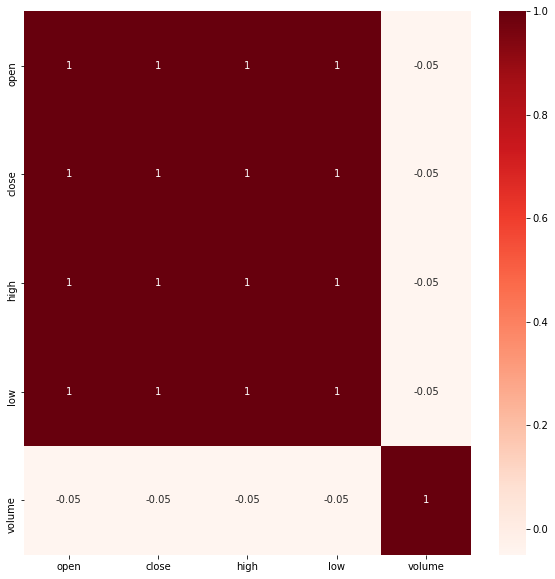

In [10]:
#Estudiando correlaciones entre variables
correlations = df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(10,10))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
# Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes

In [12]:
df.isna().sum()

open             149906
close            149906
high             149906
low              149906
volume           149906
cripto_activo         0
dtype: int64

In [13]:
# Obtenemos todas las criptos que haya en 'cripto_activo'
df['cripto_activo'].unique()


array(['AAVEUSDT', 'ADAUSDT', 'BCHUSDT', 'BNBUSDT', 'BTCUSDT', 'COMPUSDT',
       'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'LINKUSDT',
       'LTCUSDT', 'MKRUSDT', 'NEOUSDT', 'XMRUSDT'], dtype=object)

#Chequeando que los índices del DF estén en formato "time stamp"

In [14]:
df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-16 06:00:00', '2021-05-16 07:00:00',
               '2021-05-16 08:00:00', '2021-05-16 09:00:00',
               '2021-05-16 10:00:00', '2021-05-16 11:00:00',
               '2021-05-16 12:00:00', '2021-05-16 13:00:00',
               '2021-05-16 14:00:00', '2021-05-16 15:00:00'],
              dtype='datetime64[ns]', length=472960, freq=None)

In [15]:
#coinvirtiendo a formato Date Time
df.index = pd.to_datetime(df.index)

df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-16 06:00:00', '2021-05-16 07:00:00',
               '2021-05-16 08:00:00', '2021-05-16 09:00:00',
               '2021-05-16 10:00:00', '2021-05-16 11:00:00',
               '2021-05-16 12:00:00', '2021-05-16 13:00:00',
               '2021-05-16 14:00:00', '2021-05-16 15:00:00'],
              dtype='datetime64[ns]', length=472960, freq=None)

In [16]:
# Add columns with year, month, and weekday name
#no se si es útil xq se puede filtrar por índice pero capaz...
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.week

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,open,close,high,low,volume,cripto_activo,Year,Month,Week
2019-12-13 11:00:00,50.3800,50.4200,50.4400,50.2400,385.332510,DASHUSDT,2019,12,50
2020-11-10 23:00:00,67.8150,66.9880,68.1640,66.2410,19967.606000,AAVEUSDT,2020,11,46
2019-02-22 12:00:00,4.5152,4.5168,4.5395,4.5096,20258.260000,ETCUSDT,2019,2,8
2018-10-27 07:00:00,16.3960,16.3740,16.4270,16.3740,7156.416000,NEOUSDT,2018,10,43
2018-03-02 18:00:00,10913.8600,10909.9900,10950.0000,10853.0300,664.766949,BTCUSDT,2018,3,9


In [17]:
#consultando un día en particular
df.loc['2019-08-10']

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2019-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,32
2019-08-10 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,32
2019-08-10 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,32
2019-08-10 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,32
2019-08-10 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,32
...,...,...,...,...,...,...,...,...,...
2019-08-10 19:00:00,91.12,91.00,91.28,90.25,80.64569,XMRUSDT,2019,8,32
2019-08-10 20:00:00,91.00,91.15,91.38,90.99,165.13874,XMRUSDT,2019,8,32
2019-08-10 21:00:00,91.26,90.91,91.39,90.49,118.32006,XMRUSDT,2019,8,32
2019-08-10 22:00:00,90.91,90.92,91.28,90.44,210.61285,XMRUSDT,2019,8,32


In [18]:
#consultando un mes en particular
df.loc['2019-08']

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2019-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,31
2019-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,31
2019-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,31
2019-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,31
2019-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2019,8,31
...,...,...,...,...,...,...,...,...,...
2019-08-31 19:00:00,67.06,66.93,67.17,66.89,26.09940,XMRUSDT,2019,8,35
2019-08-31 20:00:00,67.04,66.29,67.04,66.07,394.82248,XMRUSDT,2019,8,35
2019-08-31 21:00:00,66.29,67.68,67.68,66.14,791.79016,XMRUSDT,2019,8,35
2019-08-31 22:00:00,67.74,67.48,67.92,67.35,108.14482,XMRUSDT,2019,8,35


In [19]:
#consultando un año en particular
df.loc['2020']

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2020,1,1
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2020,1,1
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2020,1,1
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2020,1,1
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2020,1,1
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,156.03,157.52,157.81,155.88,4681.88015,XMRUSDT,2020,12,53
2020-12-31 20:00:00,157.51,157.34,157.97,156.85,2276.82350,XMRUSDT,2020,12,53
2020-12-31 21:00:00,157.34,157.01,158.40,156.62,6381.06487,XMRUSDT,2020,12,53
2020-12-31 22:00:00,156.92,156.16,157.06,155.45,2330.94339,XMRUSDT,2020,12,53


In [20]:
#Media general para el volumen
df_means =df.groupby(['cripto_activo']).agg({'volume': ['mean']})#.reset_index()
#dejamos solo 2 decimales
df_means.describe().round(2)

,volume
,mean
count,16.00
mean,878351.02
std,3025897.74
min,249.25
25%,4246.28
50%,24274.89
75%,168861.29
max,12199641.41


#Agrupando el df por cripto activos individuales para analizarlos por separado llegado el caso

In [21]:
cripto_list = df.groupby('cripto_activo')[['cripto_activo']].count().index.tolist()
for i in cripto_list:
    grouped_criptos = df.groupby(['cripto_activo'], as_index=True).get_group(i) 
    print(i,':\n', grouped_criptos)


AAVEUSDT :
                        open   close    high  ...  Year  Month Week
2018-01-01 00:00:00     NaN     NaN     NaN  ...  2018      1    1
2018-01-01 01:00:00     NaN     NaN     NaN  ...  2018      1    1
2018-01-01 02:00:00     NaN     NaN     NaN  ...  2018      1    1
2018-01-01 03:00:00     NaN     NaN     NaN  ...  2018      1    1
2018-01-01 04:00:00     NaN     NaN     NaN  ...  2018      1    1
...                     ...     ...     ...  ...   ...    ...  ...
2021-05-16 11:00:00  559.21  547.34  560.56  ...  2021      5   19
2021-05-16 12:00:00  547.40  533.37  551.18  ...  2021      5   19
2021-05-16 13:00:00  533.12  536.66  537.99  ...  2021      5   19
2021-05-16 14:00:00  536.66  523.18  541.04  ...  2021      5   19
2021-05-16 15:00:00  523.18  519.16  524.20  ...  2021      5   19

[29560 rows x 9 columns]
ADAUSDT :
                        open   close    high  ...  Year  Month Week
2018-01-01 00:00:00     NaN     NaN     NaN  ...  2018      1    1
2018-01-01 01

In [22]:
#Media general para open
df_means =df.groupby(['cripto_activo']).agg({'open': ['mean']})

df_means.describe().round(2)

,open
,mean
count,16.00
mean,1022.55
std,3238.95
min,0.19
25%,15.27
50%,99.36
75%,293.11
max,13092.09


In [23]:
#Media general para close/high/low
df_means =df.groupby(['cripto_activo']).agg({'close': ['mean']})#.reset_index()

df_means.describe().round(2)

,close
,mean
count,16.00
mean,1022.69
std,3239.24
min,0.19
25%,15.28
50%,99.36
75%,293.17
max,13093.26


Se observa que los estadísticos de 'open' y 'close' son idénticos!

In [24]:
#Media general para high
df_means =df.groupby(['cripto_activo']).agg({'high': ['mean']})#.reset_index()
#dejamos solo 2 decimales
df_means.describe().round(2)

,high
,mean
count,16.00
mean,1029.79
std,3258.53
min,0.20
25%,15.45
50%,100.20
75%,296.46
max,13171.33


In [25]:
#Media general para low
df_means =df.groupby(['cripto_activo']).agg({'low': ['mean']})#.reset_index()
#dejamos solo 2 decimales
df_means.describe().round(2)

,low
,mean
count,16.00
mean,1014.84
std,3217.66
min,0.19
25%,15.09
50%,98.46
75%,289.67
max,13005.86


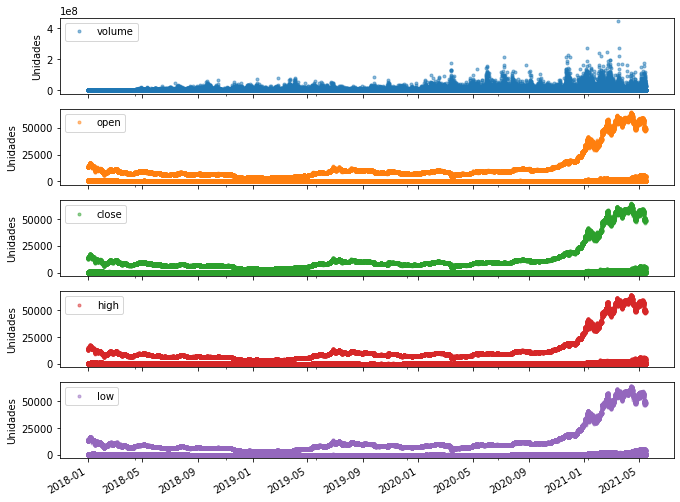

In [26]:
cols_plot = ['volume', 'open', 'close','high', 'low']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Unidades')

Text(0, 0.5, 'UNidades')

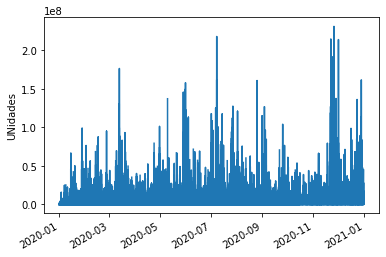

In [27]:
ax = df.loc['2020', 'volume'].plot()
ax.set_ylabel('UNidades')

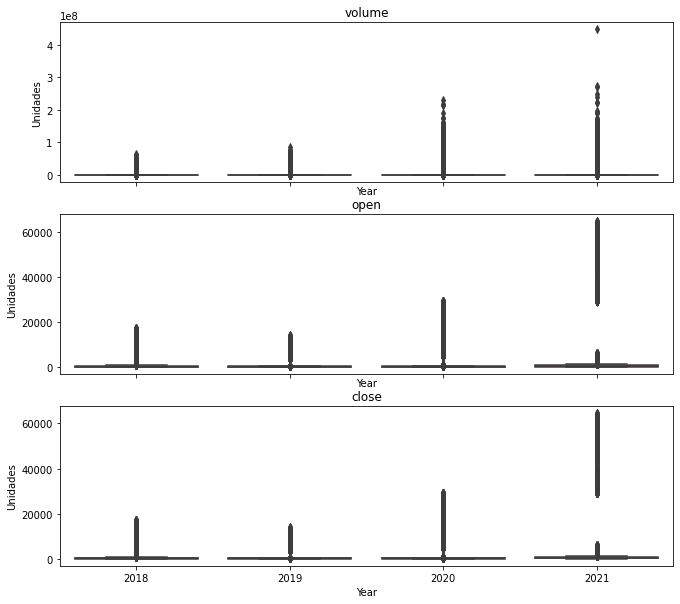

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['volume', 'open', 'close','high', 'low'], axes):
  seaborn.boxplot(data=df, x='Year', y=name, ax=ax)
  ax.set_ylabel('Unidades')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

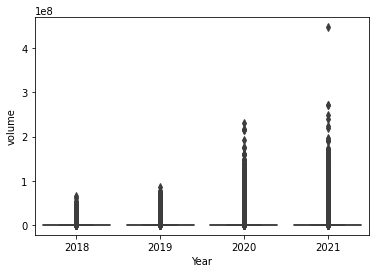

In [29]:
#gráfico parecido pero no igual (dbería ser un boxplot)
seaborn.boxplot(data=df, x='Year', y='volume')

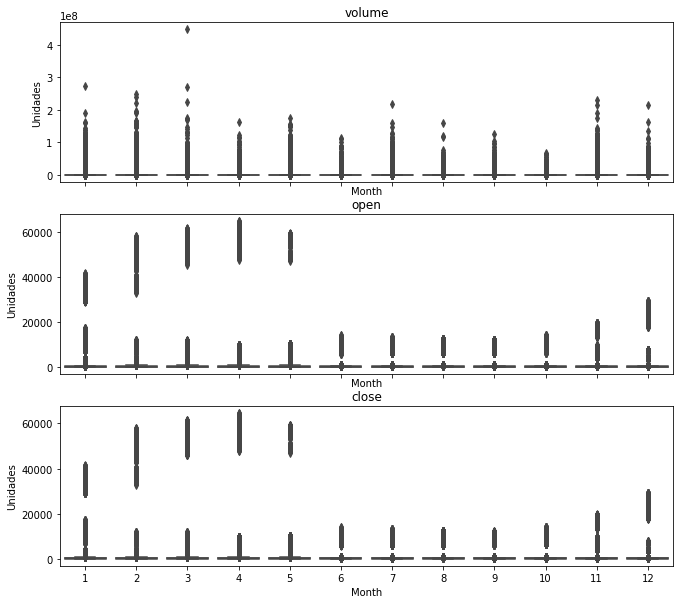

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['volume', 'open', 'close','high', 'low'], axes):
  seaborn.boxplot(data=df, x='Month', y=name, ax=ax)
  ax.set_ylabel('Unidades')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

    #parece que hubiera doble valor por mes pero creo que es porque el mismo mes de varios años:

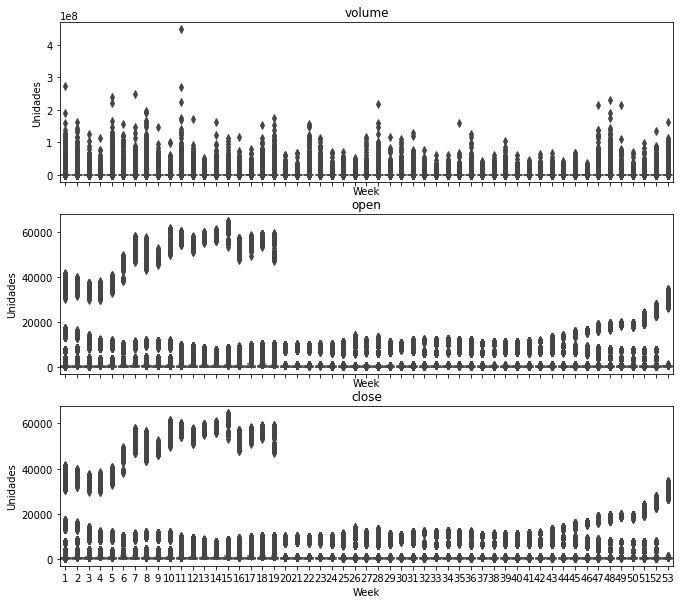

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['volume', 'open', 'close','high', 'low'], axes):
  seaborn.boxplot(data=df, x='Week', y=name, ax=ax)
  ax.set_ylabel('Unidades')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [32]:
df.dtypes

open             float64
close            float64
high             float64
low              float64
volume           float64
cripto_activo     object
Year               int64
Month              int64
Week               int64
dtype: object

In [33]:
df.tail()

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2021-05-16 11:00:00,402.23,398.90,404.47,397.26,4005.66944,XMRUSDT,2021,5,19
2021-05-16 12:00:00,399.12,393.94,401.34,393.18,3907.98362,XMRUSDT,2021,5,19
2021-05-16 13:00:00,393.65,398.16,398.64,391.34,3962.75618,XMRUSDT,2021,5,19
2021-05-16 14:00:00,398.03,393.24,399.40,390.54,3418.55213,XMRUSDT,2021,5,19
2021-05-16 15:00:00,393.02,390.40,393.19,385.91,2479.33209,XMRUSDT,2021,5,19


In [34]:
lcactivos=df['cripto_activo'].unique()
len(lcactivos)

16

Las variables **open, close, high, low y volume** son de tipo numéricas continuas, la variable **cripto_activo** es de tipo categorica y como indice de fila, la fecha.
Se tienen **16 cripto activos** para analizar.

In [35]:
df.index.min(),df.index.max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2021-05-16 15:00:00'))

In [36]:
df.head()

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2018,1,1
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2018,1,1
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2018,1,1
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2018,1,1
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT,2018,1,1


###Periodo

In [37]:
f_mins=[]
f_maxs=[]
for i in df['cripto_activo'].unique():
    f_min=df[(df['cripto_activo']==i)& (pd.notnull(df['volume']))].index.min()
    f_max=df[(df['cripto_activo']==i)& (pd.notnull(df['volume']))].index.max()
    f_mins.append(f_min)
    f_maxs.append(f_max)
    print(i,f_min,f_max)

print('\nPeriodo donde todos los cripto activos tienen información:  desde',max(f_mins),'   hasta',min(f_maxs),'\n')
f_mins.sort()
for f in f_mins:
  print(f)


AAVEUSDT 2020-10-15 03:00:00 2021-05-16 15:00:00
ADAUSDT 2018-04-17 04:00:00 2021-05-16 15:00:00
BCHUSDT 2019-11-28 10:00:00 2021-05-16 15:00:00
BNBUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
BTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
COMPUSDT 2020-06-25 06:00:00 2021-05-16 15:00:00
DASHUSDT 2019-03-28 04:00:00 2021-05-16 15:00:00
DOTUSDT 2020-08-18 23:00:00 2021-05-16 15:00:00
EOSUSDT 2018-05-28 05:00:00 2021-05-16 15:00:00
ETCUSDT 2018-06-12 02:00:00 2021-05-16 15:00:00
ETHUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
LINKUSDT 2019-01-16 10:00:00 2021-05-16 15:00:00
LTCUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
MKRUSDT 2020-07-23 14:00:00 2021-05-16 15:00:00
NEOUSDT 2018-01-01 00:00:00 2021-05-16 15:00:00
XMRUSDT 2019-03-15 04:00:00 2021-05-16 15:00:00

Periodo donde todos los cripto activos tienen información:  desde 2020-10-15 03:00:00    hasta 2021-05-16 15:00:00 

2018-01-01 00:00:00
2018-01-01 00:00:00
2018-01-01 00:00:00
2018-01-01 00:00:00
2018-01-01 00:00:00
2018-04-17

Estudiando el periodo se observa que si bien todos los dataset son del **01/01/2018** al **16/05/2021**, muchos tienen valores NaN en el principio de este intervalo de tiempo, tal vez porque no existian en ese momento. Haciendo un analisis se ve que el periodo donde todos los cripto activos tendrian valores seria desde el **15/10/2020** al **16/05/2021**, pero sería un periodo muy corto tal vez para hacer el estudio, ya que se perderia infromación importante de los otros cripto activos, ya que por ejemplo hay 8 criptoactivos que al menos tienen información desde el **12/06/2018**.

Por lo que el periodo que elegimos para estudiar es el de xx/xx/xxxx al 16/05/2021.

In [38]:
df[(df['cripto_activo']=='ADAUSDT')]

,open,close,high,low,volume,cripto_activo,Year,Month,Week
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT,2018,1,1
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT,2018,1,1
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT,2018,1,1
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT,2018,1,1
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT,2018,1,1
...,...,...,...,...,...,...,...,...,...
2021-05-16 11:00:00,2.3886,2.3828,2.4216,2.3814,25239930.91,ADAUSDT,2021,5,19
2021-05-16 12:00:00,2.3829,2.3379,2.3998,2.3211,37295824.65,ADAUSDT,2021,5,19
2021-05-16 13:00:00,2.3378,2.3406,2.3679,2.3372,25907194.99,ADAUSDT,2021,5,19
2021-05-16 14:00:00,2.3407,2.3188,2.3511,2.3022,29833036.75,ADAUSDT,2021,5,19


- Indague sobre la existencia de valores faltantes. ¿Cómo trataría a los faltantes? ¿Por qué?


Como vimos anteriormente se observa que muchos cripto activos tienen un periodo en el que tienen todos valores NaN, por lo que estos valores se podrian desestimar para redicir el tamaño del dataframe.

In [39]:
print('Cantidad de filas: ',len(df))
print('Cantidad de filas con al menos 5 NaN: ',len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=5)))
print('Cantidad de filas con al menos 1 NaN: ' ,len(df.dropna(axis=0,subset=['open','close','high','low','volume'],thresh=1)))

Cantidad de filas:  472960
Cantidad de filas con al menos 5 NaN:  323054
Cantidad de filas con al menos 1 NaN:  323054


Se ve que no existen filas en donde por ejemplo la columna volume sea nula y la columna open no.
Ya que la cantidad de filas que tienen al menos un dato nulo, es la misma cantidad de filas que al menos tienen 5 datos nulos. por lo que se podrian eliminar todas las filas con valores faltantes ya que no aportarian alguna información, y el periodo vacio quedaria al trabajarlo como serie de tiempo

In [40]:
df=df.dropna()

- Analice las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación).

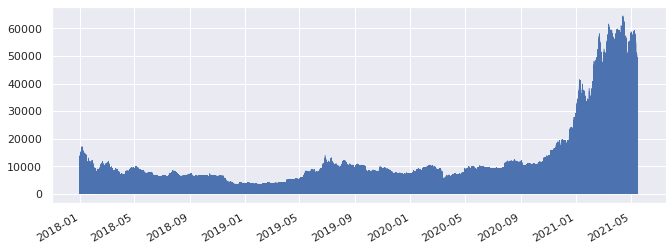

In [41]:
seaborn.set(rc={'figure.figsize':(11, 4)})
df['open'].plot(linewidth=0.5);


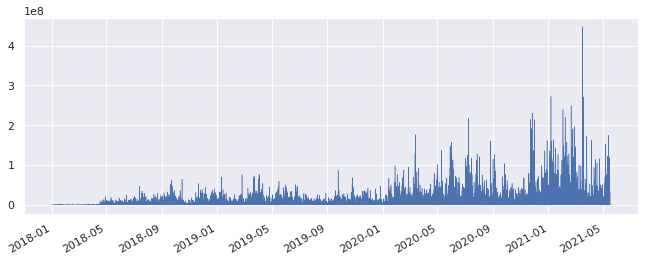

In [42]:
df['volume'].plot(linewidth=0.5);